<a href="https://colab.research.google.com/github/SivagamiNambi/2048/blob/master/Predicting_FlareUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the necessary packages #
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sklearn 
from matplotlib import pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
%matplotlib inline
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [49]:
!ls

cleaned_test.csv   sample_data	  train_resp.csv
cleaned_train.csv  test_resp.csv  VarImp.png


In [50]:
# Loading train and test data as csv.            
# Please change the names of train dataset and test dataset. along with path
# Load the datasets as csv only.

test_df = pd.read_csv('test_resp.csv')
train_df = pd.read_csv('train_resp.csv')
print("Train data shape is : ",train_df.shape)
print("Test data shape is : ",test_df.shape)

Train data shape is :  (1687, 62)
Test data shape is :  (298, 61)


In [51]:
# Columns in training set #
train_df.columns

Index(['Pat_ID', 'Flare_Up', 'Demo1', 'Demo2', 'Demo3', 'Demo4', 'Demo5', 'Demo6', 'DisHis1', 'DisHis1Times', 'DisHis2', 'DisHis2Times', 'DisHis3', 'DisHis3Times', 'DisHis4', 'DisHis5', 'DisHis6', 'DisHis7', 'DisStage1', 'DisStage2', 'LungFun1', 'LungFun2', 'LungFun3', 'LungFun4', 'LungFun5', 'LungFun6', 'LungFun7', 'LungFun8', 'LungFun9', 'LungFun10', 'LungFun11', 'LungFun12', 'LungFun13', 'LungFun14', 'LungFun15', 'LungFun16', 'LungFun17', 'LungFun18', 'LungFun19', 'LungFun20', 'Dis1', 'Dis1Treat', 'Dis2', 'Dis2Times', 'Dis3', 'Dis3Times', 'Dis4', 'Dis4Treat', 'Dis5', 'Dis5Treat', 'Dis6', 'Dis6Treat', 'Dis7', 'RespQues1', 'ResQues1a', 'ResQues1b', 'ResQues1c', 'ResQues2a', 'SmokHis1', 'SmokHis2', 'SmokHis3', 'SmokHis4'], dtype='object')

In [0]:
# Setting Pat_ID as index and dropping it from training data and test data as it is not useful in building model.
index_set = train_df['Pat_ID']
index_set.name = 'Pat_ID'
train_df = train_df.set_index(index_set)
train_df = train_df.drop(columns = 'Pat_ID' )

index_set = test_df['Pat_ID']
index_set.name = 'Pat_ID'
test_df = test_df.set_index(index_set)
test_df = test_df.drop(columns = 'Pat_ID' )


In [53]:
train_df.head(10)

,Flare_Up,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,DisHis2Times,DisHis3,DisHis3Times,DisHis4,DisHis5,DisHis6,DisHis7,DisStage1,DisStage2,LungFun1,LungFun2,LungFun3,LungFun4,LungFun5,LungFun6,LungFun7,LungFun8,LungFun9,LungFun10,LungFun11,LungFun12,LungFun13,LungFun14,LungFun15,LungFun16,LungFun17,LungFun18,LungFun19,LungFun20,Dis1,Dis1Treat,Dis2,Dis2Times,Dis3,Dis3Times,Dis4,Dis4Treat,Dis5,Dis5Treat,Dis6,Dis6Treat,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
Pat_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0.246004,0.391931,0.237792,0,0.443526,0,0.000000,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,0.000000,0.958807,0.366689,0.784810,0.545863,0.456097,0.33120,0.521298,0.345814,0.536018,0.462909,0.394909,0.808511,0.415626,0.294793,0.661468,0.474443,0.519666,0.135437,0,0.6,0.000000,0,0.000000,0.000000,0.000000,0.00,0.000000,0,0.000000,0,0.333333,1,0,0.126230,0.1032,0.2439,0.0597,0.0,0.411765,0.263620,0.482759,0.187500
2,1,1,0.225851,0.268012,0.268481,0,0.286501,0,0.000000,1,0.333333,1,0.333333,1,0,0.666667,1,0.0,0.857143,0.985795,0.417730,0.734177,0.517986,0.465873,0.33792,0.426650,0.272192,0.535196,0.464745,0.396433,0.797872,0.338906,0.295981,0.627235,0.482540,0.492253,0.138788,0,0.7,0.333333,1,0.333333,0.343750,0.333333,0.25,0.333333,1,0.333333,1,0.333333,1,0,0.607070,0.3808,0.8637,0.4949,0.1,0.117647,0.098418,0.624138,0.000000
3,0,0,0.342599,0.476945,0.296468,1,0.159780,1,0.166667,1,0.833333,0,0.000000,0,1,0.000000,1,0.6,0.142857,0.947443,0.462727,0.658228,0.632794,0.542126,0.46848,0.354993,0.227387,0.618735,0.000000,0.430117,0.851064,0.425538,0.358147,0.656904,0.633097,0.512515,0.196872,1,0.8,0.000000,0,0.333333,0.010417,0.333333,0.05,0.000000,0,0.000000,0,0.000000,0,0,0.775410,0.6318,1.0000,0.6570,0.3,0.035294,0.020211,0.510345,0.000000
4,0,1,0.246699,0.347262,0.256707,0,0.424242,0,0.000000,0,0.000000,0,0.000000,0,0,0.000000,0,0.8,0.714286,0.534091,0.306917,0.481013,0.292266,0.336118,0.26800,0.239438,0.053639,0.285127,0.277451,0.238988,0.702128,0.222828,0.121164,0.688094,0.633350,0.586412,0.252164,1,0.6,0.333333,1,0.333333,0.052083,0.000000,0.00,0.000000,0,0.000000,0,0.000000,0,1,0.298258,0.6181,0.4178,0.1164,0.4,0.176471,0.132689,0.572414,0.000000
5,1,0,0.270327,0.449568,0.239143,0,0.641873,1,0.250000,1,0.166667,1,0.166667,1,1,0.500000,1,0.8,1.000000,0.515625,0.343855,0.392405,0.333933,0.463384,0.37760,0.302767,0.086454,0.339085,0.439038,0.410151,0.489362,0.230277,0.082558,0.666033,0.522520,0.542908,0.154705,0,0.2,0.000000,0,0.333333,0.104167,0.333333,0.20,0.333333,1,1.000000,0,0.333333,1,0,0.642008,0.7250,0.8587,0.4634,0.5,0.411765,0.378735,0.708621,0.000000
7,0,1,0.129951,0.291066,0.153252,1,0.672176,0,0.000000,0,0.000000,0,0.000000,0,0,0.000000,0,0.6,0.000000,0.974432,0.520484,0.582278,0.336631,0.345183,0.26400,0.371476,0.097602,0.360997,0.354021,0.330895,0.648936,0.285823,0.090675,0.639026,0.474443,0.507747,0.136833,0,0.5,0.000000,0,0.333333,0.020833,0.000000,0.00,0.000000,0,0.333333,1,1.000000,0,0,0.163832,0.2736,0.2333,0.0858,0.2,0.082353,0.072496,0.641379,0.000000
8,0,0,0.434329,0.487032,0.377533,0,0.741047,0,0.000000,0,0.000000,0,0.000000,0,0,0.000000,0,0.6,0.142857,0.583807,0.370047,0.405063,0.375000,0.440811,0.40640,0.245164,0.062263,0.411120,0.493757,0.574608,0.425532,0.250806,0.054445,0.618106,0.295040,0.483909,0.080424,0,0.2,0.000000,0,0.000000,0.000000,0.333333,0.25,1.000000,0,0.333333,1,0.333333,1,0,0.421824,0.5090,0.5946,0.2782,0.2,0.176471,0.140598,0.603448,0.250000
10,0,1,0.328006,0.289625,0.371357,1,0.515152,0,0.000000,0,0.000000,0,0.000000,1,0,0.166667,0,0.6,0.142857,0.678977,0.340497,0.582278,0.252098,0.282083,0.18784,0.291750,0.059318,0.264311,0.258171,0.238073,0.659574,0.141768,0.085330,0.666033,0.508097,0.558403,0.164200,1,0.6,0.000000,0,0.333333,0.041667,0.000000,0.00,0.000000,0,0.000000,0,0.333333,1,0,0.649795,0.4069,0.9251,0.5393,0.4,0.117647,0.084798,0.551724,0.208333
11,0,0,0.420431,0.396254,0.411118,0,0.

In [54]:
train_df.dtypes

Flare_Up          int64
Demo1             int64
Demo2           float64
Demo3           float64
Demo4           float64
Demo5             int64
Demo6           float64
DisHis1           int64
DisHis1Times    float64
DisHis2           int64
DisHis2Times    float64
DisHis3           int64
DisHis3Times    float64
DisHis4           int64
DisHis5           int64
DisHis6         float64
DisHis7           int64
DisStage1       float64
DisStage2       float64
LungFun1        float64
LungFun2        float64
LungFun3        float64
LungFun4        float64
LungFun5        float64
LungFun6        float64
LungFun7        float64
LungFun8        float64
LungFun9        float64
LungFun10       float64
LungFun11       float64
LungFun12       float64
LungFun13       float64
LungFun14       float64
LungFun15       float64
LungFun16       float64
LungFun17       float64
LungFun18       float64
LungFun19         int64
LungFun20       float64
Dis1            float64
Dis1Treat         int64
Dis2            

### **Perform Exploratory Analysis with Data Visualisation and Statistics**

**Data Visualisation**

**Checking the distribution of variables**

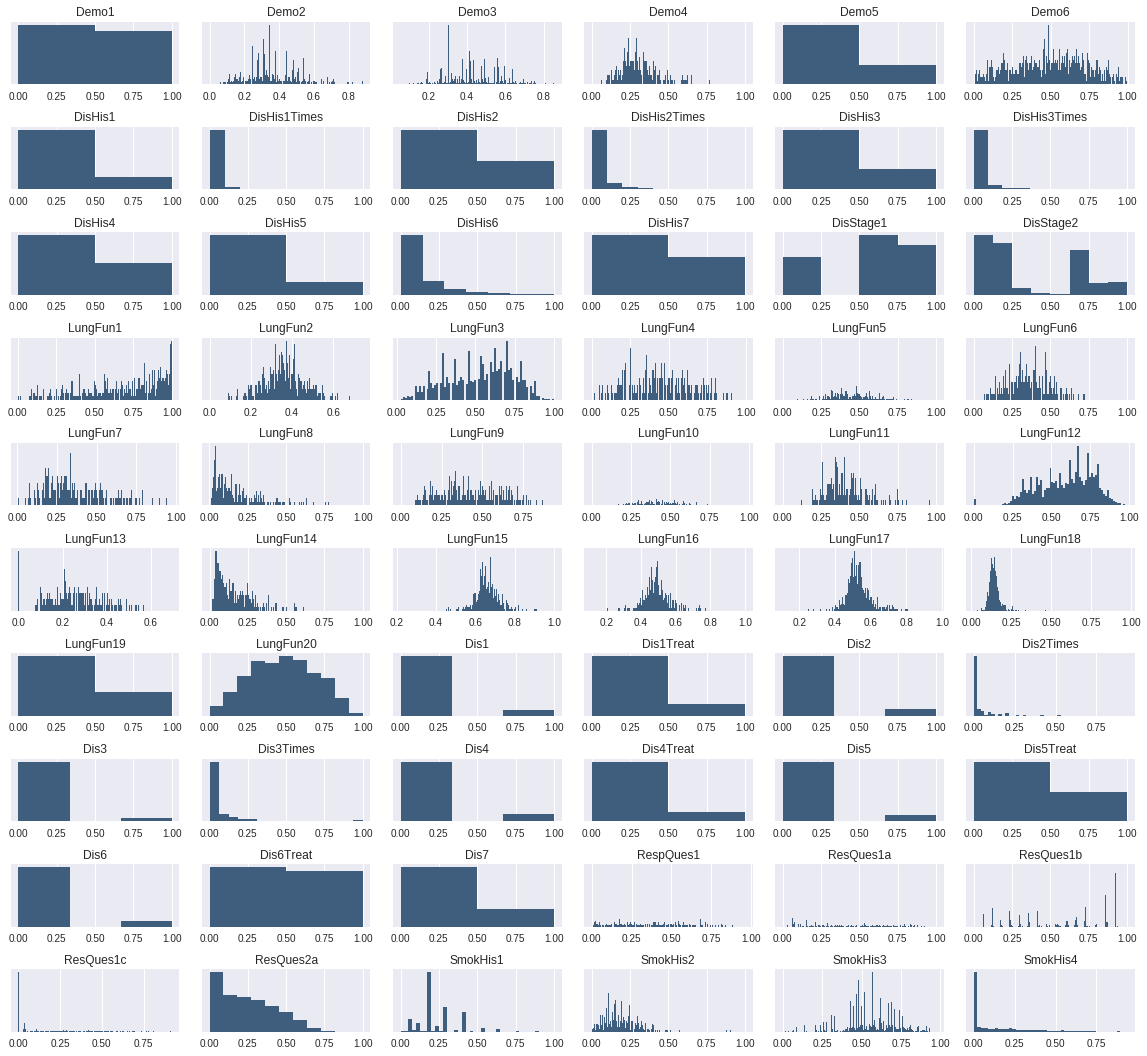

In [55]:
# plt.hist(train_df['Demo2'], normed=True, bins=30)
# plt.ylabel('Probability');
plt.figure(figsize=[16,16])
for i in range(1,train_df.shape[1]):
    plt.subplot(11, 6, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(train_df.columns.values[i])
    vals = np.size(train_df.iloc[:, i].unique())
    plt.hist(train_df.iloc[:, i], bins=vals, color='#3F5D7D')
  
plt.tight_layout()

In [56]:
test_df.describe()

,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,DisHis2Times,DisHis3,DisHis3Times,DisHis4,DisHis5,DisHis6,DisHis7,DisStage1,DisStage2,LungFun1,LungFun2,LungFun3,LungFun4,LungFun5,LungFun6,LungFun7,LungFun8,LungFun9,LungFun10,LungFun11,LungFun12,LungFun13,LungFun14,LungFun15,LungFun16,LungFun17,LungFun18,LungFun19,LungFun20,Dis1,Dis1Treat,Dis2,Dis2Times,Dis3,Dis3Times,Dis4,Dis4Treat,Dis5,Dis5Treat,Dis6,Dis6Treat,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.453020,0.357999,0.452923,0.320012,0.251678,0.490511,0.130872,0.022651,0.302013,0.047819,0.228188,0.043624,0.332215,0.130872,0.082774,0.335570,0.540268,0.311122,0.679597,0.364852,0.532580,0.425213,0.449916,0.370208,0.362463,0.173173,0.422772,0.430554,0.414143,0.597351,0.268480,0.159655,0.662511,0.500467,0.539862,0.148686,0.355705,0.474497,0.168904,0.201342,0.270694,0.044883,0.184564,0.065101,0.177852,0.140940,0.265101,0.322148,0.262864,0.473154,0.244966,0.362150,0.411313,0.517221,0.242944,0.221812,0.238650,0.178410,0.566932,0.118638
std,0.498625,0.144523,0.130733,0.124010,0.434707,0.246651,0.337828,0.081916,0.459903,0.104033,0.420370,0.115682,0.471800,0.337828,0.170959,0.472984,0.330375,0.344741,0.246749,0.102026,0.199237,0.187655,0.146020,0.133543,0.172329,0.130422,0.174846,0.153618,0.127807,0.172218,0.110582,0.118957,0.071640,0.078708,0.078017,0.041150,0.479532,0.240273,0.297443,0.401678,0.316332,0.112154,0.242848,0.143455,0.308360,0.348545,0.335299,0.468085,0.273319,0.500119,0.430791,0.222000,0.252510,0.291418,0.198407,0.193046,0.126461,0.112084,0.164459,0.179798
min,0.000000,0.016678,0.102305,0.007334,0.000000,0.005510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038352,0.077905,0.025316,0.008693,0.000000,0.067360,0.022990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083302,0.202429,0.219905,0.059201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.004394,0.120690,0.000000
25%,0.000000,0.253648,0.357349,0.235283,0.000000,0.293388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.493608,0.303224,0.392405,0.282299,0.354159,0.266320,0.231218,0.065261,0.291564,0.336210,0.325293,0.468085,0.193794,0.065730,0.626949,0.456794,0.492849,0.127897,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167930,0.214050,0.293900,0.073050,0.100000,0.176471,0.101054,0.470690,0.000000
50%,0.000000,0.337040,0.448127,0.306505,0.000000,0.511708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.142857,0.747869,0.360645,0.556962,0.429257,0.446676,0.358640,0.346751,0.136622,0.415366,0.425266,0.406645,0.617021,0.249194,0.129974,0.658996,0.492662,0.527414,0.142977,0.000000,0.500000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.359375,0.400900,0.544200,0.215400,0.200000,0.176471,0.152241,0.568966,0.020833
75%,1.000000,0.444927,0.547911,0.381731,0.750000,0.672176,0.000000,0.000000,1.000000,0.08

**Target Varaible Distribution Analysis**

Text(0.5,0,'Flare_up')

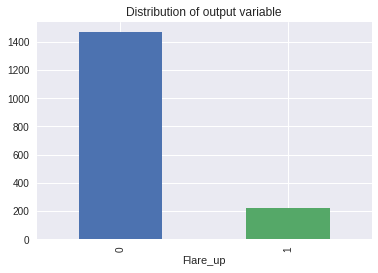

In [57]:
train_df['Flare_Up'].value_counts().plot(kind='bar', title='Distribution of output variable',
                                        ).set_xlabel('Flare_up')

In [58]:
train_df['Flare_Up'].value_counts()

0    1468
1     219
Name: Flare_Up, dtype: int64

In [59]:
1464/1687

0.8678126852400712

The output variable is Imbalanced around 87% Negative and 13 % positive.             
A model which predicts all **NO**  Flare-Up will achieve an accuracy of 87%. This  a high accuracy but a terrible model. As in such cases **FALSE NEGATIVES are WORSE than FALSE POSITIVES**.                                                                                 Accuracy alone is not the right method to select the model.
We ll have to include
1. Precision , Recall  ---> F1 (F) Score
2. ROC-AUC

**Demographic Analysis**

Text(0,0.5,'Frequency of Flare_Up')

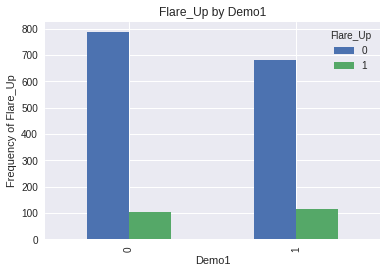

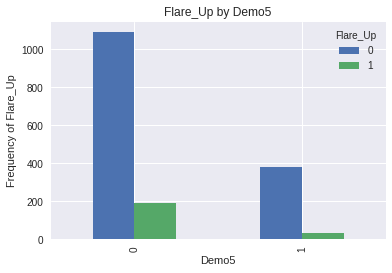

In [60]:


pd.crosstab(train_df['Demo1'],train_df['Flare_Up']).plot(kind='bar')
plt.title('Flare_Up by Demo1')
plt.xlabel('Demo1')
plt.ylabel('Frequency of Flare_Up')


pd.crosstab(train_df['Demo5'],train_df['Flare_Up']).plot(kind='bar')
plt.title('Flare_Up by Demo5')
plt.xlabel('Demo5')
plt.ylabel('Frequency of Flare_Up')



Demo5 should be an important feature.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


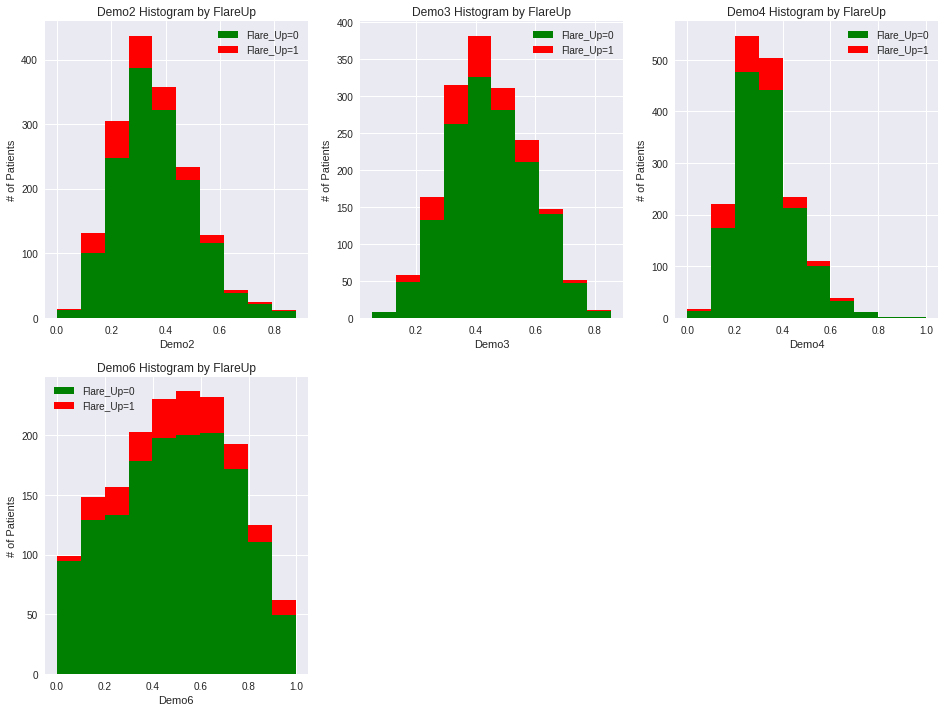

In [61]:
plt.figure(figsize=[16,12])
plt.subplot(231)
plt.hist(x = [train_df[train_df['Flare_Up']==0]['Demo2'], train_df[train_df['Flare_Up']==1]['Demo2']], 
         stacked=True, color = ['g','r'],label = ['Flare_Up=0','Flare_Up=1'])
plt.title('Demo2 Histogram by FlareUp')
plt.xlabel('Demo2')
plt.ylabel('# of Patients')
plt.legend()

plt.subplot(232)
plt.hist(x = [train_df[train_df['Flare_Up']==0]['Demo3'], train_df[train_df['Flare_Up']==1]['Demo3']], 
         stacked=True, color = ['g','r'],label = ['Flare_Up=0','Flare_Up=1'])
plt.title('Demo3 Histogram by FlareUp')
plt.xlabel('Demo3')
plt.ylabel('# of Patients')
plt.legend()

plt.subplot(233)
plt.hist(x = [train_df[train_df['Flare_Up']==0]['Demo4'], train_df[train_df['Flare_Up']==1]['Demo4']], 
         stacked=True, color = ['g','r'],label = ['Flare_Up=0','Flare_Up=1'])
plt.title('Demo4 Histogram by FlareUp')
plt.xlabel('Demo4')
plt.ylabel('# of Patients')
plt.legend()

plt.subplot(234)
plt.hist(x = [train_df[train_df['Flare_Up']==0]['Demo6'], train_df[train_df['Flare_Up']==1]['Demo6']], 
         stacked=True, color = ['g','r'],label = ['Flare_Up=0','Flare_Up=1'])
plt.title('Demo6 Histogram by FlareUp')
plt.xlabel('Demo6')
plt.ylabel('# of Patients')
plt.legend()

Observation : **Demo5** is an important indicator for Flare_Up

**Analysis with Disease Stage**

Text(0,0.5,'Frequency of Flare_Up')

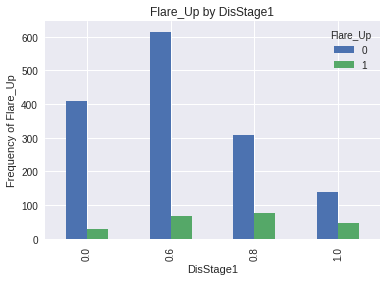

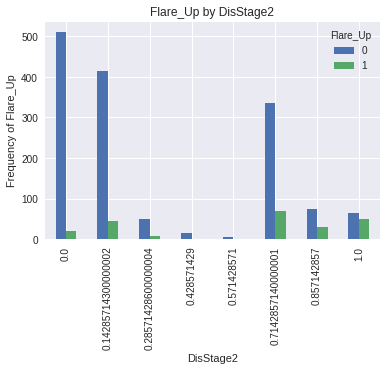

In [62]:
# plt.figure(figsize=[16,12])
# plt.subplot(231)
# plt.hist(x = [train_df[train_df['Flare_Up']==0]['DisStage1'], train_df[train_df['Flare_Up']==1]['DisStage1']], 
#          stacked=True, color = ['g','r'],label = ['0','1'])
# plt.title('DisStage1 Histogram by FlareUp')
# plt.xlabel('DisStage1')
# plt.ylabel('# of Patients')
# plt.legend()

# plt.subplot(232)
# plt.hist(x = [train_df[train_df['Flare_Up']==0]['DisStage2_0.0' ], train_df[train_df['Flare_Up']==1]['DisStage2_0.0']], 
#          stacked=True, color = ['g','r'],label = ['0','1'])
# plt.title('DisStage1 Histogram by FlareUp')
# plt.xlabel('DisStage2_0.0 ')
# plt.ylabel('# of Patients')
# plt.legend()

# plt.subplot(233)
# plt.hist(x = [train_df[train_df['Flare_Up']==0]['DisStage2_0.14285714300000002' ], train_df[train_df['Flare_Up']==1]['DisStage2_0.14285714300000002']], 
#          stacked=True, color = ['g','r'],label = ['0','1'])
# plt.title('DisStage1 Histogram by FlareUp')
# plt.xlabel('DisStage2_0.14285714300000002')
# plt.ylabel('# of Patients')
# plt.legend()
# plt.subplot(234)
# plt.hist(x = [train_df[train_df['Flare_Up']==0]['DisStage2_0.14285714300000002' ], train_df[train_df['Flare_Up']==1]['DisStage2_0.14285714300000002']], 
#          stacked=True, color = ['g','r'],label = ['0','1'])
# plt.title('DisStage1 Histogram by FlareUp')
# plt.xlabel('DisStage2_0.857142857 ')
# plt.ylabel('# of Patients')
# plt.legend()

pd.crosstab(train_df['DisStage1'],train_df['Flare_Up']).plot(kind='bar')
plt.title('Flare_Up by DisStage1')
plt.xlabel('DisStage1')
plt.ylabel('Frequency of Flare_Up')


pd.crosstab(train_df['DisStage2'],train_df['Flare_Up']).plot(kind='bar')
plt.title('Flare_Up by DisStage2')
plt.xlabel('DisStage2')
plt.ylabel('Frequency of Flare_Up')

Observation: Higher the  values of DisStage1 and DisStage2 more is the chance of getting Flared Up. It is logical as higher values of DisStage means higher severity.

**Statistical Analysis**

**Covariate Analaysis -  To check the change in the distribution of data contained in train and test file **

In [63]:
train_df['origin'] = 0
test_df['origin'] = 1
training = train_df.drop('Flare_Up',axis=1) #droping target variable
training = training.sample(1200, random_state=12)
testing = test_df.sample(250, random_state=11)

combi = training.append(testing)
y = combi['origin']
combi.drop('origin',axis=1,inplace=True)

model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []

for i in combi.columns:
  score = cross_val_score(model,pd.DataFrame(combi[i]),y,cv=2,scoring='roc_auc')
  if (np.mean(score) > 0.8):
    drop_list.append(i)

print('Drop List :',drop_list)
train_df = train_df.drop(columns='origin')
test_df = test_df.drop(columns='origin')


Drop List : []


As droplist is empty there is no drift / outliers in train and test set. That is the distributioon of variables in train and test set are comparable.

**Dummifiation of Categorical Varaibles**

In [0]:
train_df = pd.get_dummies(train_df, columns=['DisStage2','Dis1','Dis2',
                                                     'Dis3','Dis4','Dis5','Dis6'])

test_df = pd.get_dummies(test_df, columns=['DisStage2','Dis1','Dis2',
                                                     'Dis3','Dis4','Dis5','Dis6'])

In [65]:
train_df.columns

Index(['Flare_Up', 'Demo1', 'Demo2', 'Demo3', 'Demo4', 'Demo5', 'Demo6', 'DisHis1', 'DisHis1Times', 'DisHis2', 'DisHis2Times', 'DisHis3', 'DisHis3Times', 'DisHis4', 'DisHis5', 'DisHis6', 'DisHis7', 'DisStage1', 'LungFun1', 'LungFun2', 'LungFun3', 'LungFun4', 'LungFun5', 'LungFun6', 'LungFun7', 'LungFun8', 'LungFun9', 'LungFun10', 'LungFun11', 'LungFun12', 'LungFun13', 'LungFun14', 'LungFun15', 'LungFun16', 'LungFun17', 'LungFun18', 'LungFun19', 'LungFun20', 'Dis1Treat', 'Dis2Times', 'Dis3Times', 'Dis4Treat', 'Dis5Treat', 'Dis6Treat', 'Dis7', 'RespQues1', 'ResQues1a', 'ResQues1b', 'ResQues1c', 'ResQues2a', 'SmokHis1', 'SmokHis2', 'SmokHis3', 'SmokHis4', 'DisStage2_0.0', 'DisStage2_0.14285714300000002', 'DisStage2_0.28571428600000004', 'DisStage2_0.428571429', 'DisStage2_0.571428571', 'DisStage2_0.7142857140000001', 'DisStage2_0.857142857', 'DisStage2_1.0', 'Dis1_0.0', 'Dis1_0.333333333', 'Dis1_1.0', 'Dis2_0.0', 'Dis2_0.333333333', 'Dis2_1.0', 'Dis3_0.0', 'Dis3_0.333333333', 'Dis3_1.0',


In [66]:
print(train_df.shape)
print(test_df.shape)

(1687, 80)
(298, 78)


Dropping DisStage2_0.571428571 as it contains fewer values.

In [0]:
if 'DisStage2_0.571428571' in train_df.columns.tolist():
     train_df = train_df.drop(columns='DisStage2_0.571428571')
if 'DisStage2_0.571428571' in test_df.columns.tolist():
     test_df = test_df.drop(columns='DisStage2_0.571428571')

In [68]:
train_df.describe()

,Flare_Up,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,DisHis2Times,DisHis3,DisHis3Times,DisHis4,DisHis5,DisHis6,DisHis7,DisStage1,LungFun1,LungFun2,LungFun3,LungFun4,LungFun5,LungFun6,LungFun7,LungFun8,LungFun9,LungFun10,LungFun11,LungFun12,LungFun13,LungFun14,LungFun15,LungFun16,LungFun17,LungFun18,LungFun19,LungFun20,Dis1Treat,Dis2Times,Dis3Times,Dis4Treat,Dis5Treat,Dis6Treat,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4,DisStage2_0.0,DisStage2_0.14285714300000002,DisStage2_0.28571428600000004,DisStage2_0.428571429,DisStage2_0.7142857140000001,DisStage2_0.857142857,DisStage2_1.0,Dis1_0.0,Dis1_0.333333333,Dis1_1.0,Dis2_0.0,Dis2_0.333333333,Dis2_1.0,Dis3_0.0,Dis3_0.333333333,Dis3_1.0,Dis4_0.0,Dis4_0.333333333,Dis4_1.0,Dis5_0.0,Dis5_0.333333333,Dis5_1.0,Dis6_0.0,Dis6_0.333333333,Dis6_1.0
count,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000
mean,0.129816,0.472436,0.359300,0.444076,0.325831,0.241849,0.491118,0.176052,0.026181,0.323651,0.052015,0.254298,0.045791,0.344398,0.176052,0.095041,0.385299,0.534203,0.666725,0.358178,0.529815,0.413918,0.434940,0.360024,0.354983,0.174464,0.415861,0.419085,0.409096,0.593954,0.266380,0.159831,0.656473,0.491490,0.533593,0.145755,0.287493,0.479609,0.165975,0.053040,0.066746,0.138708,0.326615,0.484292,0.225845,0.356452,0.392801,0.501883,0.246523,0.226319,0.242463,0.174729,0.551153,0.144067,0.315353,0.272673,0.033788,0.009484,0.238886,0.060462,0.066983,0.678720,0.224066,0.097214,0.417309,0.483106,0.099585,0.484292,0.465323,0.050385,0.672199,0.213989,0.113811,0.523414,0.380557,0.096028,0.387078,0.532899,0.080024
std,0.336201,0.499388,0.141685,0.137103,0.125716,0.428331,0.241088,0.380977,0.077001,0.468008,0.105373,0.435595,0.113282,0.475313,0.380977,0.183574,0.486810,0.339716,0.257851,0.104557,0.207669,0.194191,0.151109,0.136852,0.173346,0.146127,0.179390,0.164737,0.131387,0.176581,0.115837,0.127756,0.060225,0.080842,0.074823,0.045927,0.452727,0.232882,0.372169,0.113263,0.146184,0.345744,0.469114,0.499901,0.418261,0.223072,0.253647,0.284805,0.204867,0.200254,0.143170,0.119613,0.168780,0.197351,0.464794,0.445466,0.180736,0.096953,0.426529,0.238412,0.250066,0.467107,0.417090,0.296337,0.493261,0.499863,0.299535,0.499901,0.498944,0.218804,0.469551,0.410241,0.317676,0.499600,0.485668,0.294718,0.487226,0.499064,0.271410
min,0.000000,0.000000,0.000000,0.053314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005682,0.000000,0.025316,0.000000,0.000000,0.000000,0.009109,0.001893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220616,0.115891,0.108462,0.016755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.260598,0.341

In [69]:
train_df.describe()

,Flare_Up,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,DisHis2Times,DisHis3,DisHis3Times,DisHis4,DisHis5,DisHis6,DisHis7,DisStage1,LungFun1,LungFun2,LungFun3,LungFun4,LungFun5,LungFun6,LungFun7,LungFun8,LungFun9,LungFun10,LungFun11,LungFun12,LungFun13,LungFun14,LungFun15,LungFun16,LungFun17,LungFun18,LungFun19,LungFun20,Dis1Treat,Dis2Times,Dis3Times,Dis4Treat,Dis5Treat,Dis6Treat,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4,DisStage2_0.0,DisStage2_0.14285714300000002,DisStage2_0.28571428600000004,DisStage2_0.428571429,DisStage2_0.7142857140000001,DisStage2_0.857142857,DisStage2_1.0,Dis1_0.0,Dis1_0.333333333,Dis1_1.0,Dis2_0.0,Dis2_0.333333333,Dis2_1.0,Dis3_0.0,Dis3_0.333333333,Dis3_1.0,Dis4_0.0,Dis4_0.333333333,Dis4_1.0,Dis5_0.0,Dis5_0.333333333,Dis5_1.0,Dis6_0.0,Dis6_0.333333333,Dis6_1.0
count,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000
mean,0.129816,0.472436,0.359300,0.444076,0.325831,0.241849,0.491118,0.176052,0.026181,0.323651,0.052015,0.254298,0.045791,0.344398,0.176052,0.095041,0.385299,0.534203,0.666725,0.358178,0.529815,0.413918,0.434940,0.360024,0.354983,0.174464,0.415861,0.419085,0.409096,0.593954,0.266380,0.159831,0.656473,0.491490,0.533593,0.145755,0.287493,0.479609,0.165975,0.053040,0.066746,0.138708,0.326615,0.484292,0.225845,0.356452,0.392801,0.501883,0.246523,0.226319,0.242463,0.174729,0.551153,0.144067,0.315353,0.272673,0.033788,0.009484,0.238886,0.060462,0.066983,0.678720,0.224066,0.097214,0.417309,0.483106,0.099585,0.484292,0.465323,0.050385,0.672199,0.213989,0.113811,0.523414,0.380557,0.096028,0.387078,0.532899,0.080024
std,0.336201,0.499388,0.141685,0.137103,0.125716,0.428331,0.241088,0.380977,0.077001,0.468008,0.105373,0.435595,0.113282,0.475313,0.380977,0.183574,0.486810,0.339716,0.257851,0.104557,0.207669,0.194191,0.151109,0.136852,0.173346,0.146127,0.179390,0.164737,0.131387,0.176581,0.115837,0.127756,0.060225,0.080842,0.074823,0.045927,0.452727,0.232882,0.372169,0.113263,0.146184,0.345744,0.469114,0.499901,0.418261,0.223072,0.253647,0.284805,0.204867,0.200254,0.143170,0.119613,0.168780,0.197351,0.464794,0.445466,0.180736,0.096953,0.426529,0.238412,0.250066,0.467107,0.417090,0.296337,0.493261,0.499863,0.299535,0.499901,0.498944,0.218804,0.469551,0.410241,0.317676,0.499600,0.485668,0.294718,0.487226,0.499064,0.271410
min,0.000000,0.000000,0.000000,0.053314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005682,0.000000,0.025316,0.000000,0.000000,0.000000,0.009109,0.001893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220616,0.115891,0.108462,0.016755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.260598,0.341

**FIlling Missing Values**
From the above it is found that there are **missing values**. 
Demographics like weight, height,age can't be 0. Also from https://en.wikipedia.org/wiki/Spirometry it is know that  each Lung function will vary between a certain range and can't be 0. So missing values are filled using the mean of the columns.

In [0]:
mis_val_cols = ['Demo2','Demo3', 'Demo4','Demo6','LungFun2','LungFun3','LungFun4',
                'LungFun5','LungFun6','LungFun7','LungFun8','LungFun9','LungFun10',
                'LungFun11','LungFun12','LungFun13','LungFun14','LungFun15',
                'LungFun16','LungFun17','LungFun18','LungFun20']
for x in mis_val_cols:
    train_df[x].replace(0, np.NaN)
    train_df[x].fillna((train_df[x].mean()), inplace=True)
    test_df[x].replace(0, np.NaN)
    test_df[x].fillna((test_df[x].mean()), inplace=True)

**Correlation Analysis**

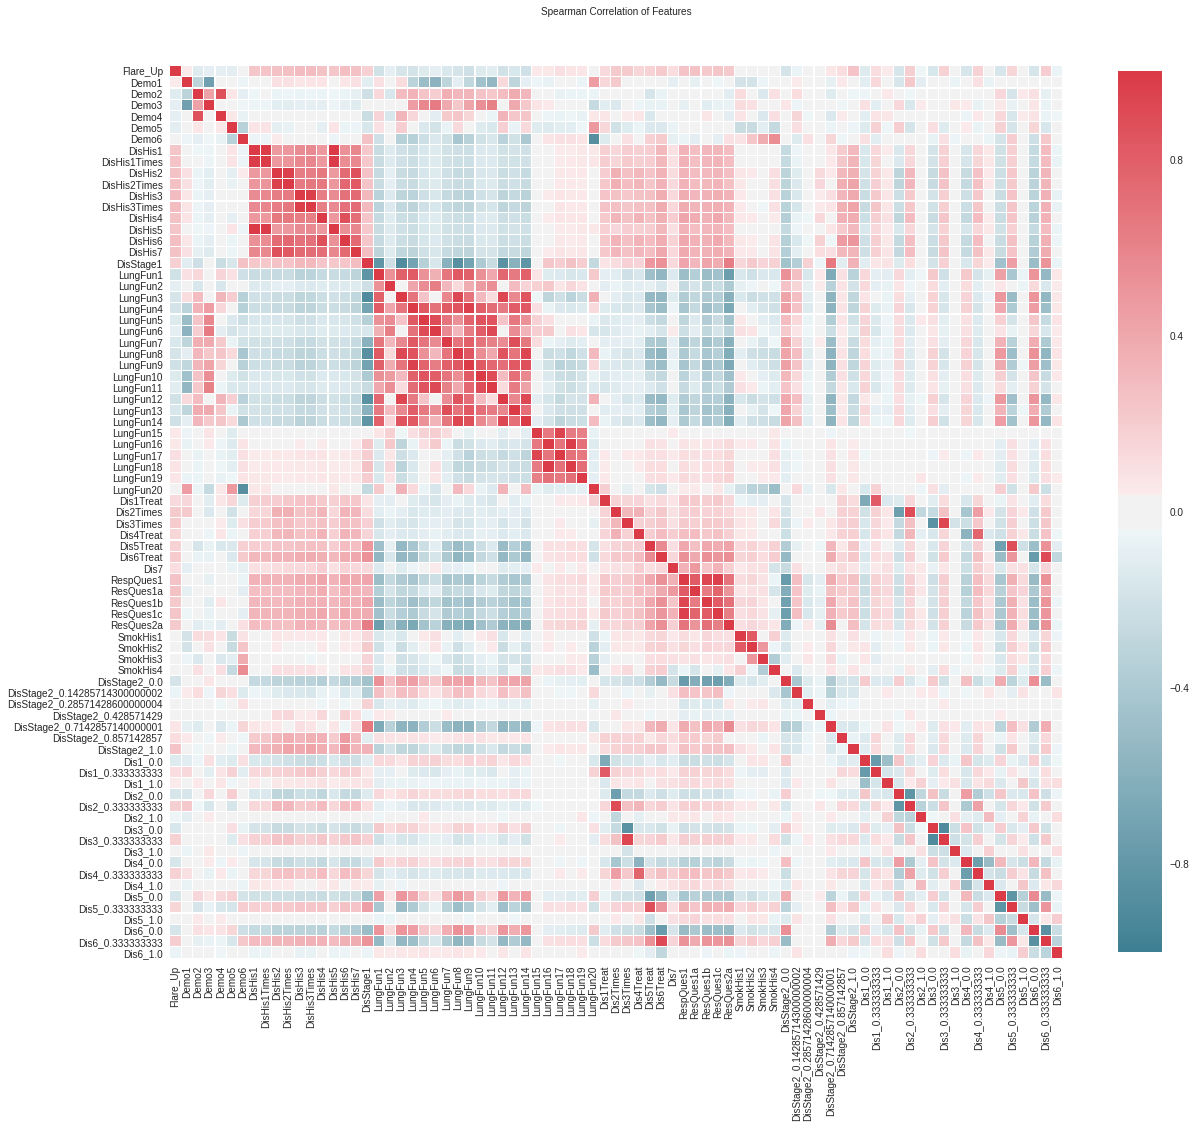

In [71]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 18))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(method='spearman'), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        #annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Spearman Correlation of Features', y=1.05, size=10)

correlation_heatmap(train_df)

Observations from Correlation Heat Map:
Square boxes formation conclude that
1. There exists strong relevance between disease history variables, number of times a disease caused get medical checkup and the respiratory questionnaire variables.

2. A dubious observation: LungFunc1 to 14 determine healthy Functioning 
LungFunc 15 to LungFuc 19 determine how unhealthy the Lung is.

3. RespQues variables are all related to one another.

4. Smoking History 1, 2  and 3 are related.

5. Dis 0 and Dis 0.33 are highly negatively correlated. It is logical to drop one of the columns   (0 - No ; 0.33 - yes 1-I don't know ) which is Dis x.0 and Disx.1 can be dropped.
Dis 5 and 6 are good indicators.

6. It is also logical that Dis 0( No) is negatively correlated with DisTreat i.e no one gets treatment without the disease and Dis 0.33 is linked with DisTreat.

7. Demo1 is related to LungFun20 (20) both of which do not show strong relations towards Flare_Up.
  LungFunc 20 is correlated with Demo5 
  LungFunc20 is negatively correlated with Demo6
  Demo6 is correlated to smoking History
  Demo5 is negatively correlated to Smoking History
  
8. Demo3 and Demo1 are negatively (strong) correlated , 
     Demo4 and Demo2 are highly correlated ( could be height and weight)
     
9. Dis His1 and Dis 5 are highly correlated. 
    DisHis 7 and DisHis 2 are moderately correlated so are DisHis 6 and 4
  
10. DisStage2.00  0.1,0.2 can be droped
       DisStage2.85 and DisStage1 are strong candidates
       
11. Disease Stage 1 and ReqsQues2a are related which negatively related to Lung Func1
  
12. Lung Fun 1, 3,4,7,8,9,12,13,14 are strong indicators drop 2,5,6,10,11
         LungFun 15 is neutral drop Lung Fun15
         LungFunc20 and Demo6 are strong negative
         LungFunc20 and SmokeHis4 are negative
        
13. Demo 6 and SmokeHis4 are strongly related.

14. Smoke His1 and SmokeHis 2 are correlated. 

15. LungFunc20 depends on Demo6
    

In [0]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))



Clubbing Linked variables by adding them and passing through sigmoid for normalising

In [0]:
comb_list = ['DisHis1','DisHis1Times'] 
drop_list = ['DisHis1','DisHis1Times']
# print([train_df['Flare_Up'].corr(train_df[x]) for x in drop_list])
sum_list = sum([train_df[x] for x in comb_list])
train_df['DisHis1'] = [sigmoid(x) for x in sum_list]
sum_list = sum([test_df[x] for x in comb_list])
test_df['DisHis1'] = [sigmoid(x) for x in sum_list]
train_df = train_df.drop(columns=drop_list)
test_df = test_df.drop(columns=drop_list)


In [0]:
comb_list = ['DisHis2','DisHis2Times'] 
drop_list = ['DisHis2','DisHis2Times']
# print([train_df['Flare_Up'].corr(train_df[x]) for x in comb_list])
sum_list = sum([train_df[x] for x in comb_list])
train_df['DisHis2'] = [sigmoid(x) for x in sum_list]
sum_list = sum([test_df[x] for x in comb_list])
test_df['DisHis2'] = [sigmoid(x) for x in sum_list]
train_df = train_df.drop(columns=drop_list)
test_df = test_df.drop(columns=drop_list)


In [0]:
comb_list = ['DisHis3','DisHis3Times'] 
drop_list = ['DisHis3']
# print([train_df['Flare_Up'].corr(train_df[x]) for x in comb_list])

sum_list = sum([train_df[x] for x in comb_list])

train_df['DisHis3'] = [sigmoid(x) for x in sum_list]
sum_list = sum([test_df[x] for x in comb_list])
test_df['DisHis3'] = [sigmoid(x) for x in sum_list]
train_df = train_df.drop(columns=drop_list)
test_df = test_df.drop(columns=drop_list)
# train_df['Flare_Up'].corr(train_df['DisHis3'])


In [0]:
drop_list = ['Dis1_0.0','Dis1_0.333333333',	'Dis1_1.0']
train_df = train_df.drop(columns=drop_list)
test_df = test_df.drop(columns=drop_list)
# print([train_df['Flare_Up'].corr(train_df[x]) for x in drop_list])




In [0]:
comb_list = ['Dis2_0.333333333','Dis2Times'] 
drop_list = ['Dis2_0.0','Dis2_0.333333333',	'Dis2_1.0','Dis2Times']
# print([train_df['Flare_Up'].corr(train_df[x]) for x in drop_list])

sum_list = sum([train_df[x] for x in comb_list])

train_df['Dis2'] = [sigmoid(x) for x in sum_list]
sum_list = sum([test_df[x] for x in comb_list])
test_df['Dis2'] = [sigmoid(x) for x in sum_list]
train_df = train_df.drop(columns=drop_list)
test_df = test_df.drop(columns=drop_list)
# train_df['Flare_Up'].corr(train_df['Dis2'])

In [0]:
comb_list = ['Dis3_0.333333333','Dis3Times'] 
drop_list = ['Dis3_0.0','Dis3_0.333333333',	'Dis3_1.0','Dis3Times']
# print([train_df['Flare_Up'].corr(train_df[x]) for x in drop_list])

sum_list = sum([train_df[x] for x in comb_list])

train_df['Dis3'] = [sigmoid(x) for x in sum_list]
sum_list = sum([test_df[x] for x in comb_list])
test_df['Dis3'] = [sigmoid(x) for x in sum_list]
train_df = train_df.drop(columns=drop_list)

test_df = test_df.drop(columns=drop_list)
# train_df['Flare_Up'].corr(train_df['Dis3'])

In [0]:
comb_list = ['Dis4_0.333333333','Dis4Treat'] 
drop_list = ['Dis4_0.0','Dis4_0.333333333',	'Dis4_1.0','Dis4Treat']
# print([train_df['Flare_Up'].corr(train_df[x]) for x in drop_list])

sum_list = sum([train_df[x] for x in comb_list])

train_df['Dis4'] = [sigmoid(x) for x in sum_list]
sum_list = sum([test_df[x] for x in comb_list])
test_df['Dis4'] = [sigmoid(x) for x in sum_list]
train_df = train_df.drop(columns=drop_list)

test_df = test_df.drop(columns=drop_list)
# train_df['Flare_Up'].corr(train_df['Dis4'])

In [0]:

drop_list = ['Dis5_0.0','Dis5_0.333333333',	'Dis5_1.0']
train_df = train_df.drop(columns=drop_list)
test_df = test_df.drop(columns=drop_list)
# print([train_df['Flare_Up'].corr(train_df[x]) for x in drop_list])



In [0]:
comb_list = ['Dis6_0.333333333','Dis6Treat'] 
drop_list = ['Dis6_0.0','Dis6_0.333333333',	'Dis6_1.0','Dis6Treat']
# print([train_df['Flare_Up'].corr(train_df[x]) for x in drop_list])

sum_list = sum([train_df[x] for x in comb_list])

train_df['Dis6'] = [sigmoid(x) for x in sum_list]
sum_list = sum([test_df[x] for x in comb_list])
test_df['Dis6'] = [sigmoid(x) for x in sum_list]
train_df = train_df.drop(columns=drop_list)

test_df = test_df.drop(columns=drop_list)
# train_df['Flare_Up'].corr(train_df['Dis6'])

In [82]:
print(train_df.shape)
print(test_df.shape)
print(list(train_df))
print(list(test_df))

(1687, 56)
(298, 55)
['Flare_Up', 'Demo1', 'Demo2', 'Demo3', 'Demo4', 'Demo5', 'Demo6', 'DisHis3Times', 'DisHis4', 'DisHis5', 'DisHis6', 'DisHis7', 'DisStage1', 'LungFun1', 'LungFun2', 'LungFun3', 'LungFun4', 'LungFun5', 'LungFun6', 'LungFun7', 'LungFun8', 'LungFun9', 'LungFun10', 'LungFun11', 'LungFun12', 'LungFun13', 'LungFun14', 'LungFun15', 'LungFun16', 'LungFun17', 'LungFun18', 'LungFun19', 'LungFun20', 'Dis1Treat', 'Dis5Treat', 'Dis7', 'RespQues1', 'ResQues1a', 'ResQues1b', 'ResQues1c', 'ResQues2a', 'SmokHis1', 'SmokHis2', 'SmokHis3', 'SmokHis4', 'DisStage2_0.0', 'DisStage2_0.14285714300000002', 'DisStage2_0.28571428600000004', 'DisStage2_0.428571429', 'DisStage2_0.7142857140000001', 'DisStage2_0.857142857', 'DisStage2_1.0', 'Dis2', 'Dis3', 'Dis4', 'Dis6']
['Demo1', 'Demo2', 'Demo3', 'Demo4', 'Demo5', 'Demo6', 'DisHis3Times', 'DisHis4', 'DisHis5', 'DisHis6', 'DisHis7', 'DisStage1', 'LungFun1', 'LungFun2', 'LungFun3', 'LungFun4', 'LungFun5', 'LungFun6', 'LungFun7', 'LungFun8', 'Lu

In [0]:
train_df.to_csv('cleaned_train.csv')
test_df.to_csv('cleaned_test.csv')

**p-value Distribution Analysis**                                                                               
** Hypothesis tests** are used to test the validity of a claim that is made about a population. This claim that’s on trial, in essence, is called the null hypothesis.                                                                                                                      
**p-value** helps you determine the significance of your results.                      
All hypothesis tests ultimately use a p-value to weigh the strength of the evidence (what the data are telling you about the population). The p-value is a number between 0 and 1 and interpreted in the following way:

1. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

2. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

3. p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.

In [84]:
print(train_df.shape)
print(test_df.shape)

(1687, 56)
(298, 55)


Correlation and removing multicollinearity

[1.0, 0.04428744112289109, 0.10705534013106634, 0.08827978347406532, 0.07869775225391432, 0.09458703191874318, 0.021601380534831262, 0.21628813309186257, 0.2619546464932126, 0.23822315177073664, 0.2596620643165374, 0.2631702864320554, 0.1641520454747906, 0.20090265608486105, 0.08663832455663238, 0.18122924340113616, 0.18763362032911235, 0.10966345568323214, 0.09515150546481534, 0.14717779706559883, 0.1586235831717006, 0.20372591836895368, 0.11304449983392278, 0.11414835009640696, 0.19929844828509558, 0.1515209602749943, 0.1791081712726694, 0.05960912097752266, 0.038986283244316515, 0.10832566242776039, 0.04362087817706273, 0.06250107743999248, 0.017683508663206247, 0.13107560737519977, 0.174762960719287, 0.11194302372939645, 0.2554311320857267, 0.2582884729780249, 0.21701852002063035, 0.23925609508781695, 0.22056167968508894, 0.0013842912938991907, 0.003022728342082805, 0.01841037440720062, 0.010161719535497592, 0.18242619628757634, 0.058277776659011724, 0.0038998111917087786, 0.037794

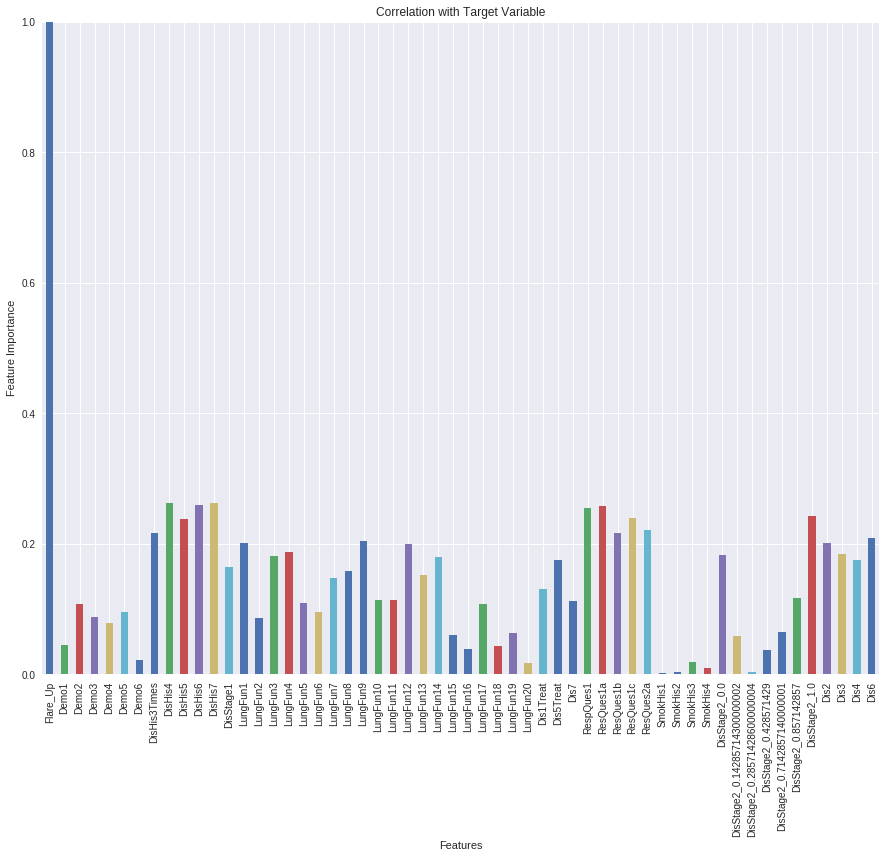

In [85]:
corr_val = [ abs( train_df['Flare_Up'].corr(train_df[x]) ) for x  in train_df.columns]
print(corr_val)
freq_series = pd.Series.from_array(corr_val)
plt.figure(figsize=(15, 12))
print()
plt.ylim((0,1))
fig = freq_series.plot(kind='bar')
fig.set_title('Correlation with Target Variable')
fig.set_xlabel('Features')
fig.set_ylabel('Feature Importance')
fig.set_xticklabels(train_df.columns)
plt.savefig('VarImp')

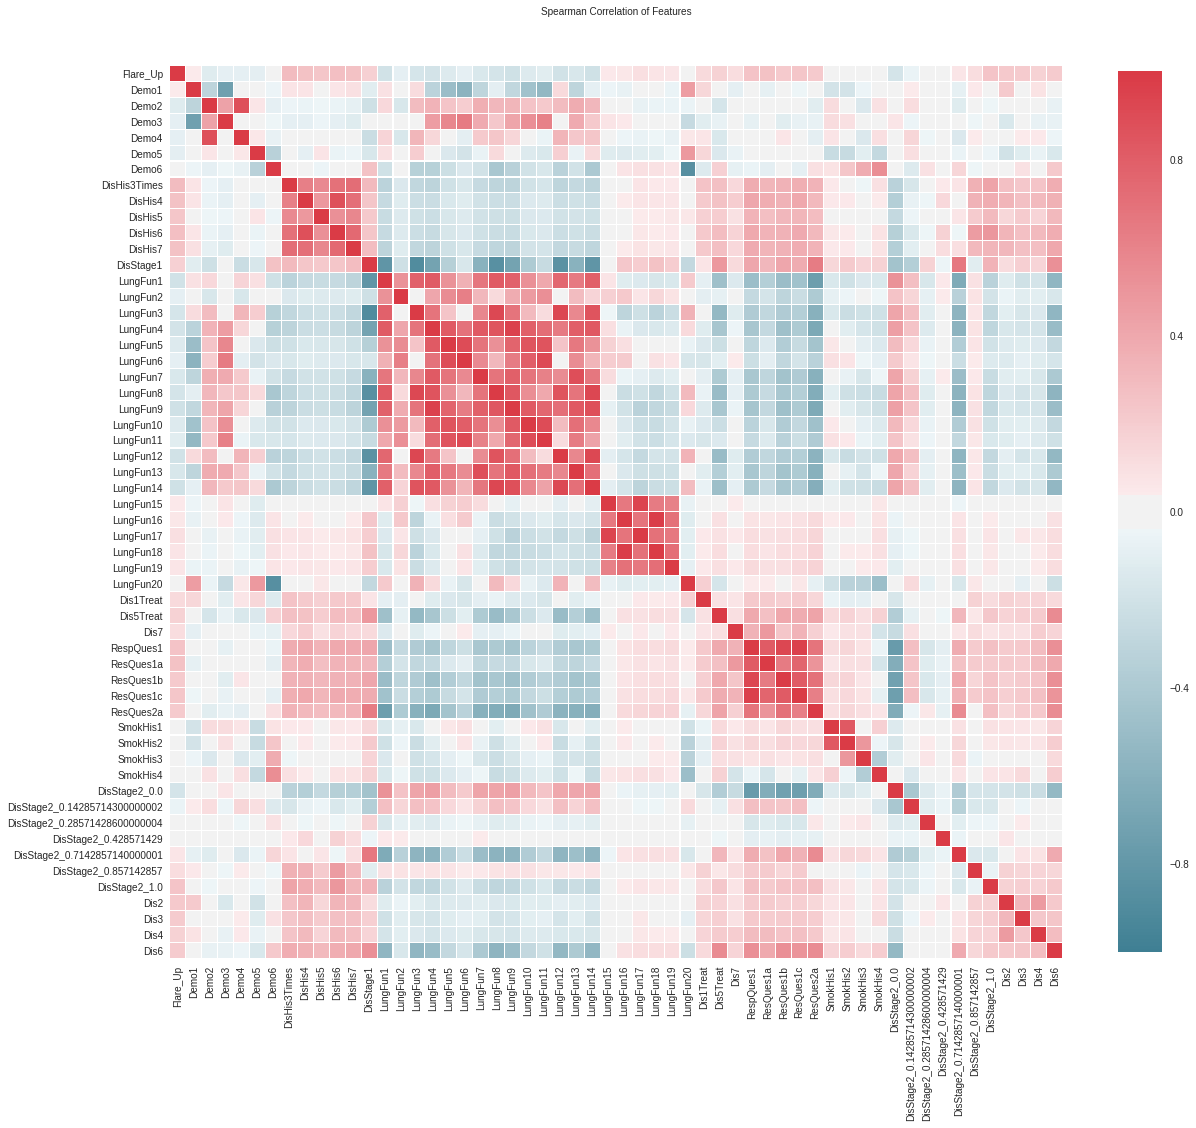

In [86]:
correlation_heatmap(train_df)

As Demo6 increases Smoking His Increases and LunfFun20 value decreases.

Removing multicollinearity
Demo2 Demo4,,      Demo3 Demo1,, Demo6 LungFun20,, Demo6 SmokingHis  and Lunfun20


In [0]:
# drop_list = ['Demo4','Demo1','LungFun20']
# train_df = train_df.drop(columns= drop_list)
# test_df = test_df.drop(columns= drop_list)

In [88]:
import sklearn.feature_selection
X = train_df.loc[:, train_df.columns != 'Flare_Up']
y = train_df.loc[:, train_df.columns == 'Flare_Up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #splitting into Test  Set and Validation Set

var_imp = sklearn.feature_selection.f_regression(X_train, y_train, center=True)
var_imp[1]
# import statsmodels.api as sm
# logit_model=sm.Logit(y_train,X_train)
# result=logit_model.fit()
# var_imp = np.asarray( result.pvalues.tolist())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([9.08430164e-02, 1.04299074e-04, 3.40442563e-04, 8.02087181e-03,
       2.17294837e-03, 7.77440258e-01, 3.20654633e-10, 6.16572249e-19,
       9.44702087e-15, 1.23826777e-16, 1.73785618e-17, 2.54737697e-09,
       3.51335784e-12, 2.16732068e-03, 2.05142596e-09, 6.69238639e-11,
       1.33037612e-04, 3.08377540e-04, 6.32933089e-07, 8.57704753e-08,
       2.08667111e-12, 2.04185236e-04, 3.19926967e-05, 1.83263242e-11,
       7.36591244e-08, 6.93188730e-10, 8.77412952e-02, 2.90025551e-01,
       2.93383016e-04, 1.72193892e-01, 2.15714377e-02, 9.75798436e-01,
       1.33830267e-07, 7.31445956e-10, 3.94610872e-06, 1.35666192e-21,
       1.02197186e-20, 1.12695661e-15, 7.22227073e-20, 4.42556432e-16,
       9.85307954e-01, 7.27319733e-01, 3.71015837e-01, 9.23221877e-01,
       9.06001604e-10, 6.22177768e-02, 5.14780531e-01, 1.76031144e-01,
       4.76664976e-03, 5.80230299e-04, 2.37625911e-15, 3.08162026e-13,
       5.32136797e-10, 3.38406961e-09, 3.23806342e-14])

[Text(0,0,'Demo1'),
 Text(0,0,'Demo2'),
 Text(0,0,'Demo3'),
 Text(0,0,'Demo4'),
 Text(0,0,'Demo5'),
 Text(0,0,'Demo6'),
 Text(0,0,'DisHis3Times'),
 Text(0,0,'DisHis4'),
 Text(0,0,'DisHis5'),
 Text(0,0,'DisHis6'),
 Text(0,0,'DisHis7'),
 Text(0,0,'DisStage1'),
 Text(0,0,'LungFun1'),
 Text(0,0,'LungFun2'),
 Text(0,0,'LungFun3'),
 Text(0,0,'LungFun4'),
 Text(0,0,'LungFun5'),
 Text(0,0,'LungFun6'),
 Text(0,0,'LungFun7'),
 Text(0,0,'LungFun8'),
 Text(0,0,'LungFun9'),
 Text(0,0,'LungFun10'),
 Text(0,0,'LungFun11'),
 Text(0,0,'LungFun12'),
 Text(0,0,'LungFun13'),
 Text(0,0,'LungFun14'),
 Text(0,0,'LungFun15'),
 Text(0,0,'LungFun16'),
 Text(0,0,'LungFun17'),
 Text(0,0,'LungFun18'),
 Text(0,0,'LungFun19'),
 Text(0,0,'LungFun20'),
 Text(0,0,'Dis1Treat'),
 Text(0,0,'Dis5Treat'),
 Text(0,0,'Dis7'),
 Text(0,0,'RespQues1'),
 Text(0,0,'ResQues1a'),
 Text(0,0,'ResQues1b'),
 Text(0,0,'ResQues1c'),
 Text(0,0,'ResQues2a'),
 Text(0,0,'SmokHis1'),
 Text(0,0,'SmokHis2'),
 Text(0,0,'SmokHis3'),
 Text(0,0,'Smo

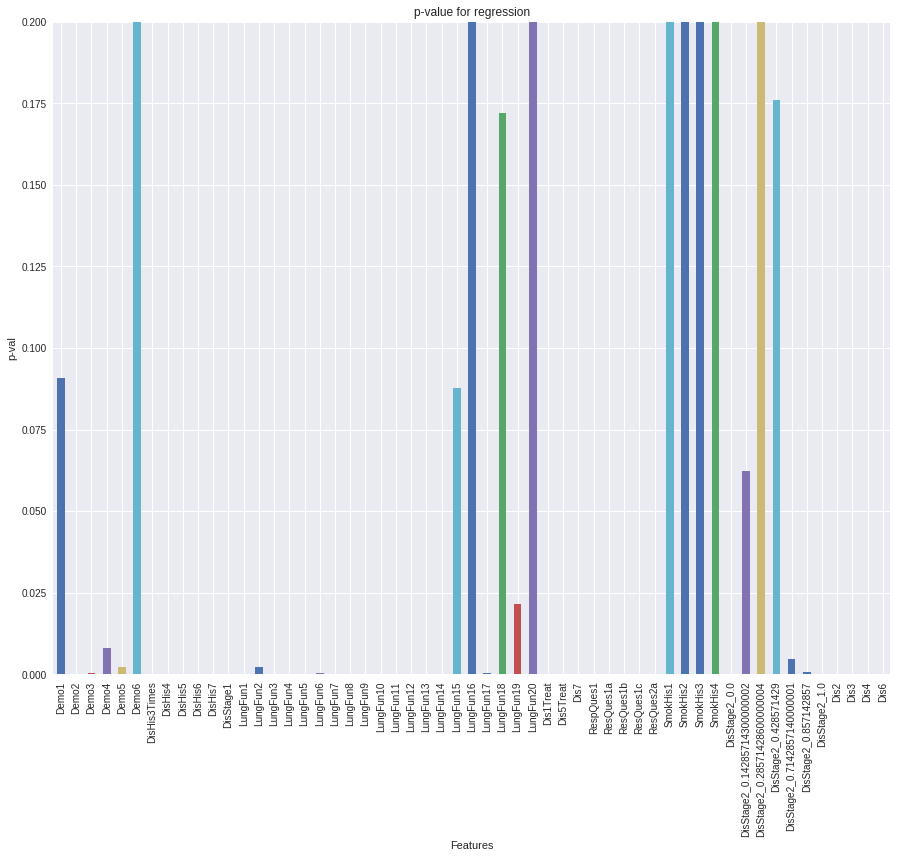

In [89]:
freq_series = pd.Series.from_array(var_imp[1])
plt.figure(figsize=(15, 12))

plt.ylim((0,0.20))
fig = freq_series.plot(kind='bar')
fig.set_title('p-value for regression')
fig.set_xlabel('Features')
fig.set_ylabel('p-val')
fig.set_xticklabels(X_train.columns)


Comparing with correlation value

In [90]:
train_df.shape

(1687, 56)

**Over Sampling Using SMOTE**

In [91]:
X = train_df.loc[:, train_df.columns != 'Flare_Up']
y = train_df.loc[:, train_df.columns == 'Flare_Up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

!pip install imblearn
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
os_data_X,os_data_y = os.fit_sample(X_train, y_train)


# from imblearn.under_sampling import TomekLinks

# tl = TomekLinks(return_indices=True, ratio='majority')
# os_data_X,os_data_y,idl = tl.fit_sample(X_train, y_train)

# from imblearn.combine import SMOTETomek

# smt = SMOTETomek(ratio='auto')
# X_smt, y_smt = smt.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Flare_Up'])



# # we can Check the numbers of our data
# print("length of oversampled data is ",len(os_data_X))
# print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Flare_Up']==0]))
# print("Number of subscription",len(os_data_y[os_data_y['Flare_Up']==1]))
# print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Flare_Up']==0])/len(os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Flare_Up']==1])/len(os_data_X))



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
os_data_X.describe()

,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis3Times,DisHis4,DisHis5,DisHis6,DisHis7,DisStage1,LungFun1,LungFun2,LungFun3,LungFun4,LungFun5,LungFun6,LungFun7,LungFun8,LungFun9,LungFun10,LungFun11,LungFun12,LungFun13,LungFun14,LungFun15,LungFun16,LungFun17,LungFun18,LungFun19,LungFun20,Dis1Treat,Dis5Treat,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4,DisStage2_0.0,DisStage2_0.14285714300000002,DisStage2_0.28571428600000004,DisStage2_0.428571429,DisStage2_0.7142857140000001,DisStage2_0.857142857,DisStage2_1.0,Dis2,Dis3,Dis4,Dis6
count,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,0.530407,0.340832,0.419292,0.318502,0.190560,0.499353,0.059039,0.487887,0.252733,0.141536,0.509379,0.602808,0.604088,0.345938,0.487476,0.364006,0.407775,0.336220,0.318164,0.145285,0.369888,0.393929,0.385066,0.558796,0.243346,0.134272,0.658815,0.495974,0.542812,0.149602,0.331176,0.480141,0.230467,0.424524,0.290306,0.425263,0.468750,0.578435,0.305589,0.281445,0.243163,0.176923,0.557898,0.144705,0.215630,0.252547,0.030905,0.005854,0.286627,0.075622,0.131352,0.653237,0.648786,0.607024,0.744239
std,0.486463,0.133688,0.127625,0.117196,0.381184,0.224125,0.100011,0.494613,0.421478,0.201588,0.494451,0.320319,0.259753,0.102937,0.203579,0.185641,0.135704,0.124639,0.157950,0.133647,0.170232,0.144077,0.119018,0.170477,0.106963,0.117656,0.053976,0.079022,0.073986,0.047037,0.455983,0.214680,0.403918,0.476309,0.435735,0.221887,0.249158,0.269403,0.209268,0.202653,0.125404,0.103042,0.151142,0.184300,0.409921,0.431895,0.166372,0.076304,0.449354,0.262076,0.335538,0.118948,0.122533,0.147124,0.173611
min,0.000000,0.000000,0.070605,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024148,0.000000,0.025316,0.000000,0.000000,0.000000,0.009109,0.001893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220616,0.115891,0.108462,0.016755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000
25%,0.000000,0.239750,0.319539,0.236609,0.000000,0.334079,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.375000,0.279439,0.317196,0.209562,0.320886,0.246897,0.191433,0.048958,0.225698,0.300485,0.298343,0.415132,0.159314,0.051339,0.630658,0.451202,0.499310,0.125537,0.000000,0.300000,0.000000,0.000000,0.000000,0.257608,0.283024,0.414500,0.129725,0.100000,0.176471,0.106638,0.470188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000
50%,0.926349,0.325851,0.409715,0.304382,0.000000,0.509642,0.000000,0.085825,0.000000,0.000000,0.802652,0.600000,0.638309,0.345870,0.481332,0.350686,0.397851,0.322197,0.292010,0.092565,0.353162,0.387383,0.374658,0.553191,0.227271,0.092132,0.655648,0.487706,0.533788,0.142418,0.000000,0.500000,0.000000,0.000000,0.000000,0.432120,0.477500,0.619150,0.288900,0.300000,0.193613,0.160369,0.570775,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.733102,0.731059,0.500000,0.880797
75%,1.000000,0.423094,0.510251,0.382170,0.000000,0.671479,0.083333,1.000000,0.561427,0.166667,1.000000,0.800000,0.839489,0.410854,0.654685,0.493405,0.494372,0.413764,0.422747,0.202777,0.487949,0.483083,0.459230,0.691489,0.311837,0.181548,0.684757,0.536056,0.57449

Now the data is perfectly balanced. Oversampling should be done only to train data for obvious reasons.

**Recursive Feature Elimination**

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features

In [93]:
os_data_X_vars = os_data_X.columns.values.tolist()
# y=['Flare_Up'] 
# X=[i for i in _vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

# print(rfe.support_)
# print(rfe.ranking_)

columns = os_data_X.columns.values.tolist()
cols = [x for x,y in zip(columns, rfe.support_) if y==True ]
print('Extracted Columns',cols)

Extracted Columns ['Demo2', 'Demo3', 'Demo4', 'Demo5', 'Demo6', 'DisHis5', 'LungFun6', 'LungFun10', 'LungFun11', 'LungFun12', 'LungFun13', 'LungFun14', 'LungFun16', 'LungFun17', 'ResQues1a', 'ResQues1b', 'SmokHis1', 'DisStage2_0.428571429', 'Dis2', 'Dis3']


In [94]:
X_train = os_data_X[cols]
y_train = os_data_y['Flare_Up']
test_df = test_df[cols]
X_test = X_test[cols]
y_test = y_test['Flare_Up']

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


         Current function value: 0.495263
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.285      
Dependent Variable:      Flare_Up             AIC:                  2070.5771  
Date:                    2018-09-29 05:21     BIC:                  2183.0890  
No. Observations:        2050                 Log-Likelihood:       -1015.3    
Df Model:                19                   LL-Null:              -1421.0    
Df Residuals:            2030                 LLR p-value:          8.4079e-160
Converged:               0.0000               Scale:                1.0000     
No. Iterations:          35.0000                                               
-------------------------------------------------------------------------------
                       Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-------------------------------------------------------------------------------
Demo2  

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:

drop_list  = [ x for x,y in zip(X_train.columns,result.pvalues.tolist() ) if y >=0.05]

X_test = X_test.drop(columns=drop_list)
X_train = X_train.drop(columns=drop_list)
test_df = test_df.drop(columns=drop_list)


In [96]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.499724
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.279      
Dependent Variable: Flare_Up         AIC:              2076.8685  
Date:               2018-09-29 05:21 BIC:              2155.6268  
No. Observations:   2050             Log-Likelihood:   -1024.4    
Df Model:           13               LL-Null:          -1421.0    
Df Residuals:       2036             LLR p-value:      4.2847e-161
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
              Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Demo2         11.7086    2.6259   4.4588  0.0000    6.5618  16.8553
Demo3         -7.8615    1.2651  -6.2140  0.0000 

**Model Fitting**

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix



logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)



lll= [(x,y) for x,y in zip(logreg.coef_,X_train.columns)]
print(lll)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))



confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import f1_score 
f1_score(y_test, y_pred,average='micro') 

[(array([-0.96844632, -1.60797719, -1.27810403, -0.88843567,  0.77210729,
        0.57154425, -2.26372307, -1.56887374,  0.69927023,  1.98566996,
        0.99250249, -0.83028689,  3.05140977,  1.91610385]), 'Demo2')]
Accuracy of logistic regression classifier on test set: 0.73
[[321 122]
 [ 16  48]]
             precision    recall  f1-score   support

          0       0.95      0.72      0.82       443
          1       0.28      0.75      0.41        64

avg / total       0.87      0.73      0.77       507



0.7278106508875741

In [0]:
new_test = pd.read_csv('test_resp.csv') 

new_test['Labels'] = logreg.predict(test_df)
new_test['Probabilities'] = logreg.predict_proba(test_df)[:,1]
new_test.to_csv('final.csv')
# test_df.shape

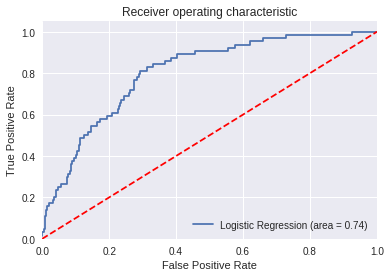

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_nothing')
plt.show()
